***importing necessary libraries***

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***read data***

In [13]:
# read the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# have a view of the top 5 rows of data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***explaratory data analysis***

In [14]:
# retrieve dataset information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# check for data types
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# check for number of columns and rows
train_data.shape

(891, 12)

***extracting dependent and independent variables***

In [17]:
# remove the target variable
x = train_data.drop('Survived', axis=1)

# assign y to the target variable
y = train_data['Survived']

***deal with missing values***

In [18]:
# check the presence of null values
x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# drop the column having missing value greater than 50%
x.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [20]:
# handle missing values

# numeric value imputation with mean
x['Age'] = x['Age'].fillna(x['Age'].mean())

# categorical value imputation with mode (most frequency category)
x['Embarked'] = x['Embarked'].fillna(x['Embarked'].mode()[0])

***encoding categorical data***

In [21]:
# categorical data
x = pd.get_dummies(x, columns=['Sex', 'Embarked'], drop_first=True)
x.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


<Axes: >

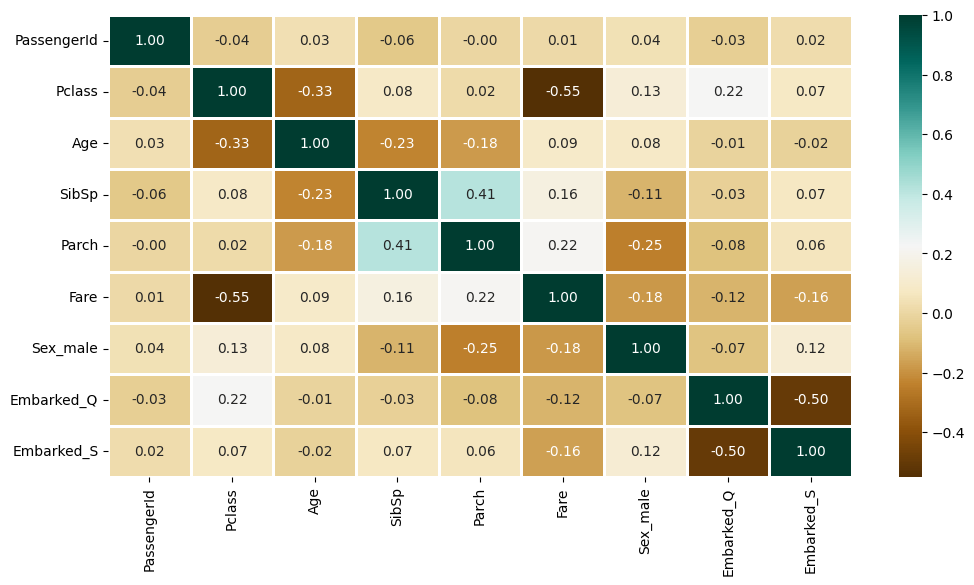

In [23]:
# heatmap to show correlation between features
plt.figure(figsize=(12, 6))
sns.heatmap(x.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [ ]:
# visualizing box plot
sns.boxplot(x=x[''])

***splitting data into test and train data***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

***feature scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

array([[-1.16343003e+00,  8.19250590e-01, -2.82437263e-03, ...,
        -1.37207547e+00, -3.14269681e-01, -1.63985340e+00],
       [-1.26383402e-02, -3.80968381e-01,  9.66293694e-02, ...,
         7.28822884e-01, -3.14269681e-01,  6.09810609e-01],
       [ 1.44220868e+00, -3.80968381e-01,  9.66293694e-02, ...,
         7.28822884e-01, -3.14269681e-01, -1.63985340e+00],
       ...,
       [ 7.18633972e-01,  8.19250590e-01, -2.82437263e-03, ...,
         7.28822884e-01,  3.18198052e+00, -1.63985340e+00],
       [ 4.49217857e-01,  8.19250590e-01,  4.78884313e-01, ...,
        -1.37207547e+00, -3.14269681e-01,  6.09810609e-01],
       [ 9.30318063e-01, -3.80968381e-01,  2.31370804e+00, ...,
         7.28822884e-01, -3.14269681e-01,  6.09810609e-01]])